# Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Importing File

In [2]:
df = pd.read_csv('mall customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [11]:
df=df.rename(columns={'Annual Income (k$)': 'Income', 'Spending Score (1-100)': 'Score'})
df=df.drop('CustomerID',axis=1)
df

,Gender,Age,Income,Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


# Data Visualization

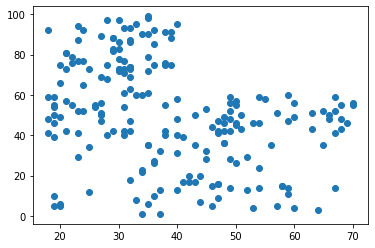

In [13]:
plt.scatter(df.Age, df.Score)

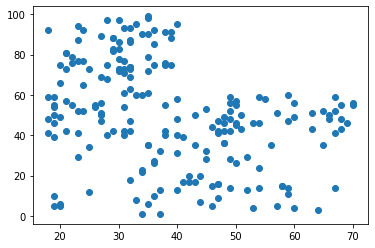

In [14]:
plt.scatter(df.Age, df.Score)

Text(0.5, 0, 'Score')

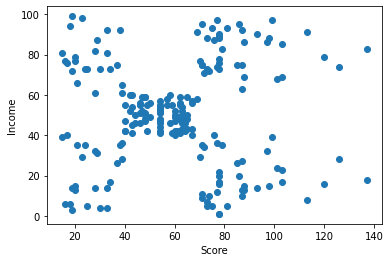

In [16]:
plt.scatter(df.Income, df.Score)
plt.ylabel('Income')
plt.xlabel('Score')

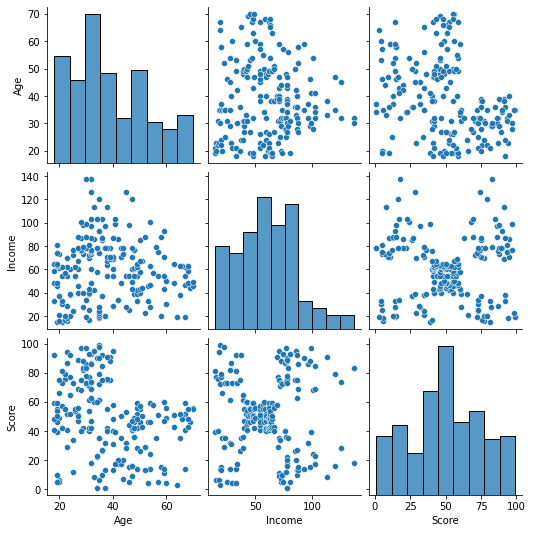

In [23]:
sns.pairplot(df[['Age', 'Income', 'Score']])

# Cluster - KMeans Algorithm

In [24]:
import sklearn.cluster as cluster

In [25]:
kmeans = cluster.KMeans(n_clusters=5)

In [27]:
predicted_cluster = kmeans.fit_predict(df[['Income','Score']])
predicted_cluster

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 2,
       0, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1, 2, 1, 3, 1, 3, 1,
       2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [28]:
df['predicted_cluster']=predicted_cluster
df

,Gender,Age,Income,Score,predicted_cluster
0,Male,19,15,39,0
1,Male,21,15,81,4
2,Female,20,16,6,0
3,Female,23,16,77,4
4,Female,31,17,40,0
...,...,...,...,...,...
195,Female,35,120,79,1
196,Female,45,126,28,3
197,Male,32,126,74,1
198,Male,32,137,18,3


In [30]:
centroid = kmeans.cluster_centers_
centroid

array([[26.30434783, 20.91304348],
       [86.53846154, 82.12820513],
       [55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636]])

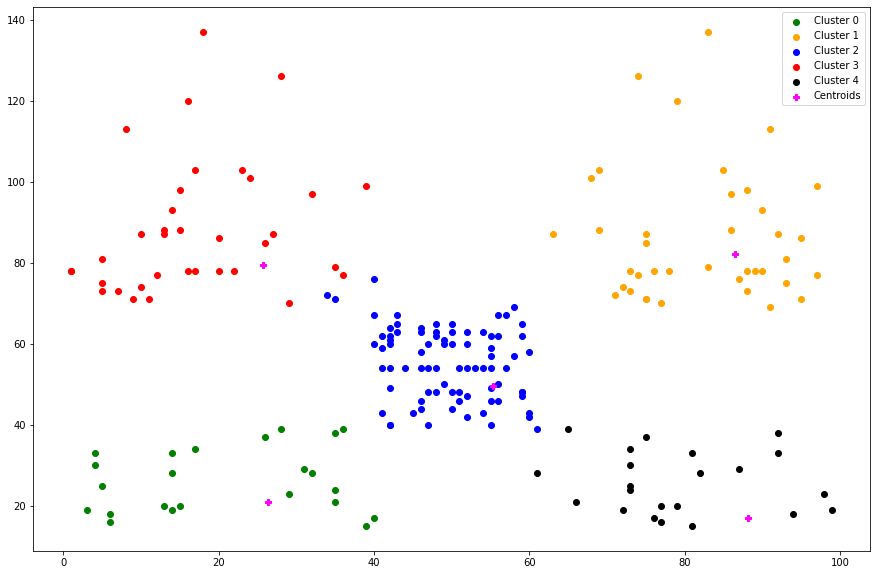

In [33]:
df0 = df[df.predicted_cluster==0]
df1 = df[df.predicted_cluster==1]
df2 = df[df.predicted_cluster==2]
df3 = df[df.predicted_cluster==3]
df4 = df[df.predicted_cluster==4]

plt.figure(figsize=(15,10))

plt.scatter(df0['Score'],df0['Income'],color='green',label='Cluster 0')
plt.scatter(df1['Score'],df1['Income'],color='orange',label='Cluster 1')
plt.scatter(df2['Score'],df2['Income'],color='blue',label='Cluster 2')
plt.scatter(df3['Score'],df3['Income'],color='red',label='Cluster 3')
plt.scatter(df4['Score'],df4['Income'],color='black',label='Cluster 4')

plt.scatter(centroid[:,0],centroid [:,1],color='magenta',marker="P",label='Centroids')

plt.legend()

# Hyper Tuning - Find the best Centroid value

In [38]:
from sklearn.cluster import KMeans
wcss = []
cluster = range(1,15)
for k in range(1,15):
    km = KMeans(n_clusters=k)
    km.fit(df[['Score','Income']])
    wcss.append(km.inertia_)

In [39]:
wcss

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37265.86520484345,
 30273.394312070028,
 25022.485004530332,
 21916.79478984372,
 19794.559507517566,
 17886.030094013244,
 16099.92568836392,
 14653.254504632801,
 13470.61570981201]

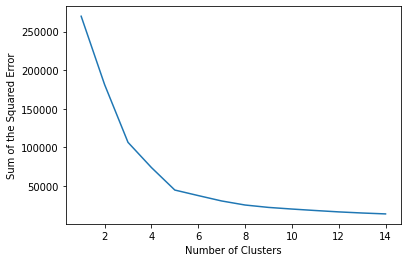

In [41]:
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of the Squared Error')
plt.plot(cluster, wcss)

### Here We can see the plot. We can get the best Centroid value using Elbo Method.